# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objective:
Classify XOR data using a multi-layer perceptron

## Overview
Minksy and Papert (1969) showed that classifying XOR was a big problem for neural network architectures of the 1960s, known as perceptrons. Let’s looks at how a multi-layer perceptron based neural network solves this problem of the truth table, called the ‘XOR’ (either A or B but not both). 


![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR9Q-xKcyvxJ13ElQFJsBTws8coBQeZen2qpl0x0XQqkN0DnYRc)


## Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}

In [3]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}

In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "Demo_XOR_MLP" #name of the notebook
Answer = "Ungraded"
def setup():
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


In [5]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Data Preparation

XOR gate implements an **exclusive OR**; that is, a true output results if one, and only one, of the inputs to the gate is true.

Initializing an array with possible combinations of 0's and 1's and apply XOR on each combination.

In [7]:
# Initializing the xor inputs to a variable X
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

Use the XOR operator ^ between two values to perform bitwise "exclusive or" on their binary representations

In [11]:
XOR_df = pd.DataFrame(X,columns=(['A','B']))

# XOR Operator ^  
XOR_df['A XOR B'] = np.array([i[0] ^ i[1] for i in X])
XOR_df

,A,B,A XOR B
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


Features are the inputs (0's and 1's ) in A and B columns and Output is the XOR operator of A and B columns.

In [14]:
# Defining features and labels
features = XOR_df[['A','B']]
labels = XOR_df['A XOR B']

### Visualizing the XOR data

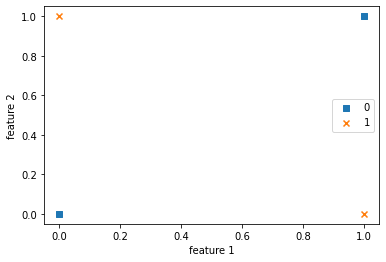

In [33]:
# Function to plot the data
def plot(X,outputs):
  markers = ('s', 'x', 'o', '^', 'v')
 
  for idx, cl in enumerate(np.unique(outputs)):
        # Choosing the data points with markers
        plt.scatter(x=X[outputs == cl, 0], y=X[outputs == cl, 1], marker=markers[idx], label=cl)

  plt.xlabel('feature 1')
  plt.ylabel('feature 2')
  plt.legend()
  plt.show()

plot(features.values,labels.values)

##Linear Classifier

Let's see the classification using Linear Classifier

In [38]:
# Initializing and applying the Linear classifier model on XOR data
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(features, labels)

print('Actuals:', labels.values)
print('Predictions using LC:', sgd.predict(features)) 
print('LC_score:', sgd.score(features, labels)) 

Actuals: [0 1 1 0]
Predictions using LC: [1 1 1 1]
LC_score: 0.5


##Logistic Regression

Let's see the classification using Logistic Regression

In [39]:
# Initializing and applying the logistic regression model on XOR data
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(features, labels)

print('Actuals:', labels.values)
print('Predictions using LR:', logreg.predict(features)) 
print('LR_score:', logreg.score(features, labels)) 

Actuals: [0 1 1 0]
Predictions using LR: [0 0 0 0]
LR_score: 0.5


Plotting the data with meshgrid to classify using boundary regions, predicting the meshgrid points and indicating the area with color specifies the class it belongs to.

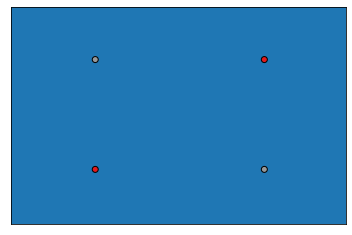

In [41]:
''' plot_meshgrid() function takes the input X, model and arranges meshgrid points,
    using the model it gets the predictions for meshgrid points
    to indicate and classify with region boundary'''

def plot_meshgrid(X,Y, model):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.tab20)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Set1)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

plot_meshgrid(features.values,labels.values, sgd)

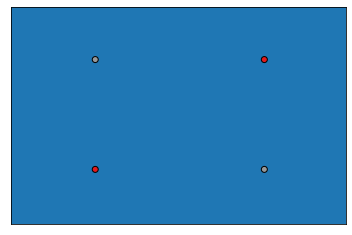

In [42]:
# Calling the plot_meshgrid function for visualizing the decision boundaries using logistic regression
plot_meshgrid(features.values,labels.values, logreg)

* *Expected to classify decision boundaries diagonally as the data points are diagonally located. But, It is not correctly classifying the decision boundaries using linear classifier and logistic regression.*

##Classification of XOR data with a Multi-layer Perceptron (MLP)


![alt text](https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/XOR_MLP.PNG)


The XOR problem is a classic problem in artificial neural network research. It consists of predicting output value of exclusive-OR gate. We do it using a Multi layer perceptron.

XOR(X1, X2) = AND(<font color='green'>NOT(</font><font color='red'>AND(X1,X2)</font><font color='green'>), OR(X1, X2)</font>)


#### We will now build a neural network that learns the XOR function

In [46]:
#Solving xor problem using multilayer perceptron in sklearn
from sklearn.neural_network import MLPClassifier

# MLP classifier from sklearn
model = MLPClassifier()
model.fit(features, labels)

print('expected:', labels.values)
print('predictions:', model.predict(features)) 
print('score:', model.score(features, labels))
print(model.loss_) 
print(model.loss_curve_)

expected: [0 1 1 0]
predictions: [0 1 1 0]
score: 1.0
0.4115533963797939
[0.6922119731634923, 0.6905703830122929, 0.6889641694877261, 0.6874196771221442, 0.6859006567212528, 0.6844285863768252, 0.6830377159921943, 0.6816829484898532, 0.6803322174024476, 0.6789963161763644, 0.6776652761278272, 0.6763331555911358, 0.6750029841867694, 0.6737245196522484, 0.672426982521852, 0.6711356788100172, 0.6698682601499759, 0.6686345077145902, 0.6674542388167392, 0.6662740302950855, 0.665097609668589, 0.6639357724211655, 0.6627776236422789, 0.6616399240671432, 0.6605004688781552, 0.6593691489234145, 0.6582567802428865, 0.6571389461119763, 0.6559968002752905, 0.6548677270439532, 0.6537518001443999, 0.6526321189705688, 0.651500125321916, 0.6503783134064712, 0.6492906563254789, 0.6481768740448105, 0.6470809815857805, 0.6459384322591678, 0.6448036496826106, 0.6436788784447728, 0.6425364405128359, 0.6414101603147743, 0.6403133455124649, 0.6392156965101572, 0.6381494434632998, 0.6370719608686929, 0.6359805

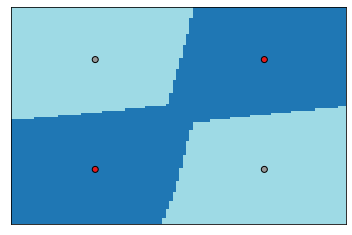

In [47]:
# Plot the meshgrid with MLP Classifier
plot_meshgrid(features.values,labels.values, model)

## Please answer the questions below to complete the experiment:

In [48]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Too Simple, I am wasting time" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [49]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "none" #@param {type:"string"}


In [50]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [51]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [52]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 7955
Date of submission:  20 Oct 2020
Time of submission:  06:31:05
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
